# Генератор псевдослучайных чисел 
— это алгоритм, который выдает числа, похожие на случайные, но на самом деле они полностью определяются начальным значением (seed).

Такие числа называются псевдослучайными, потому что при одинаковом seed они будут одинаковыми.

## Как работает генератор псевдослучайных чисел?
Самый простой пример — линейный конгруэнтный метод (LCG):

X_{n+1} = (a * X_n + c) % m

Где:

X_n — текущее число,

a — множитель (коэффициент),

c — приращение,

m — модуль,

X_0 — начальное значение (seed).


In [1]:
class MyRandom:
    def __init__(self,seed = 1):
        self.a = 1664525       # стандартные параметры
        self.c = 1013904223
        self.m = 2 ** 32
        self.state = seed      # начальное значение (seed)

    def next(self):
        self.state = (self.a*self.state+self.c) % self.m
        return self.state

    def rand(self): # возвращает число от 0 до 1
        return self.next() / self.m

In [2]:
rng = MyRandom(seed=42)
for _ in range(5):
    print(rng.rand())


0.2523451747838408
0.08812504541128874
0.5772811982315034
0.22255426598712802
0.37566019711084664


### Важно понимать:
Генератор не является настоящим случайным — он детерминирован.

В стандартной библиотеке Python random использует Mersenne Twister — это гораздо более сложный и надёжный генератор.

### Пример на Python
Напишем собственный генератор:

напишем класс генераторов псевдослучайных чисел. Он будет:

* поддерживать задание seed (для воспроизводимости);

* генерировать последовательности чисел;

* использовать разные алгоритмы (например, линейный конгруэнтный метод);

* иметь методы для:

* * генерации чисел от 0 до 1,

* * генерации целых чисел в заданном диапазоне, 

* * отображения распределения (график).



In [1]:
import matplotlib.pyplot as plt

In [2]:
class MyRandom:
    def __init__(self,seed=1):
        self.seed = seed
        self.a = 1103515245  # множитель
        self.c = 12345       # приращение
        self.m = 2**31       # модуль
        self.state = seed

    def reseed(self,new_seed):
        """Устанавливает новое значение начального состояния."""
        self.state = new_seed

    def random(self):
        """Возвращает псевдослучайное число от 0 до 1."""
        self.state = (self.a * self.state + self.c)%self.m
        return self.state/self.m
    
    def randint(self,low,high):
        """Генерирует псевдослучайное целое число в диапазоне [low, high]."""
        return low + int(self.random() * (high-low+1))
    
    def generate(self,n=100):
        """Генерирует список из n чисел от 0 до 1."""
        return [self.random() for _ in range(n)]
    
    def plot_distribution(self, n=1000):
        """Строит гистограмму распределения случайных чисел."""
        data = self.generate(n)
        plt.hist(data,bins=20,edgecolor = 'black')
        plt.title(f'Распределение {n} случайных чисел')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()

0.5823075897060335
15
[0.46597642498090863, 0.7770372582599521, 0.42286502895876765, 0.03337232954800129, 0.41738913068547845]


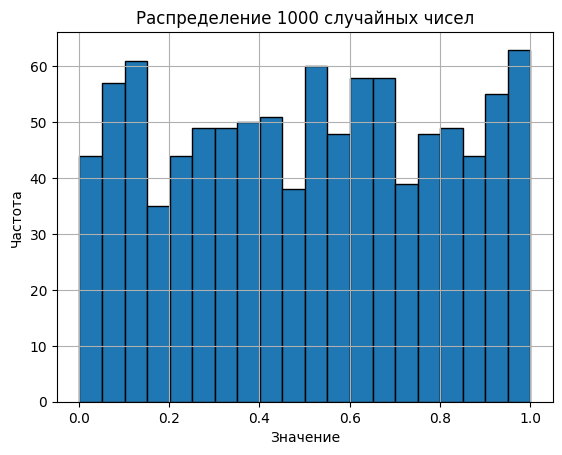

In [3]:
rng = MyRandom(seed=42)

# Одно число от 0 до 1
print(rng.random())

# Целое число от 10 до 20
print(rng.randint(10, 20))

# Список из 5 случайных чисел
print(rng.generate(5))

# График распределения
rng.plot_distribution(1000)


Новые функции, которые добавим:
1. choice(sequence) — случайный элемент из списка.

2. shuffle(sequence) — перемешивание списка (по алгоритму Фишера-Йейтса).

3. normal(mu, sigma) — числа по нормальному (Гауссову) распределению (через метод Бокса-Мюллера).

4. randrange(start, stop, step) — как range, но случайный выбор одного значения.

5. sample(sequence, k) — случайный выбор k неповторяющихся элементов.

In [4]:
import math

class MyRandom:
    def __init__(self,seed=1):
        self.seed = seed
        self.a = 1103515245  # множитель
        self.c = 12345       # приращение
        self.m = 2**31       # модуль
        self.state = seed

    def reseed(self,new_seed):
        """Устанавливает новое значение начального состояния."""
        self.state = new_seed

    def random(self):
        """Возвращает псевдослучайное число от 0 до 1."""
        self.state = (self.a * self.state + self.c)%self.m
        return self.state/self.m
    
    def randint(self,low,high):
        """Генерирует псевдослучайное целое число в диапазоне [low, high]."""
        return low + int(self.random() * (high-low+1))
    
    def generate(self,n=100):
        """Генерирует список из n чисел от 0 до 1."""
        return [self.random() for _ in range(n)]
    
    def plot_distribution(self, n=1000):
        """Строит гистограмму распределения случайных чисел."""
        data = self.generate(n)
        plt.hist(data,bins=20,edgecolor = 'black')
        plt.title(f'Распределение {n} случайных чисел')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()

    def choice(self, sequence):
        """Выбирает случайный элемент из последовательности."""
        idx = self.randint(0,len(sequence) - 1)
        return sequence[idx]
    
    def shuffle(self,sequence):
        """Перемешивает последовательность по алгоритму Фишера-Йейтса."""
        n = len(sequence)
        for i in range(n-1,0,-1):
            j = self.randint(0,i)
            sequence[i], sequence[j] = sequence[j], sequence[i]

    def normal(self, mu=0, sigma=1):
        """Генерирует число с нормальным распределением (Box-Muller)."""
        u1 = self.random()
        u2 = self.random()
        z = math.sqrt(-2*math.log(u1))* math.cos(2 * math.pi * u2)
        return mu+z*sigma
    
    def randrange(self,start,stop=None,step = 1):
        """Выбирает случайное значение из диапазона."""
        if stop is None:
            start,stop = 0,start
        values = list(range(start,stop,step))
        return self.choice(values)
    
    def sample(self,sequence,k):
        """Возвращает k уникальных случайных элементов из последовательности."""
        if k > len(sequence):
            raise ValueError("Sample size larger than population.")
        seq_copy = list(sequence)
        self.shuffle(seq_copy)
        return seq_copy[:k]


In [5]:
rng = MyRandom(seed=123)

print(rng.choice(['яблоко', 'груша', 'слива']))
lst = [1, 2, 3, 4, 5]
rng.shuffle(lst)
print(lst)

print(rng.normal(mu=100, sigma=15))
print(rng.randrange(10, 50, 5))
print(rng.sample(['a', 'b', 'c', 'd', 'e'], 3))


яблоко
[1, 3, 2, 5, 4]
78.80205788140918
20
['b', 'e', 'c']


1. random_string(length)
Генерация случайной строки из букв и цифр.

2. exponential(lambd)
Число из экспоненциального распределения.

3. bernoulli(p)
Бернуллиевская случайная величина (0 или 1 с заданной вероятностью).

4. set_seed_from_time()
Автоматическая инициализация генератора от текущего времени.


In [9]:
import math
import time

class MyRandom:
    def __init__(self,seed=1):
        self.seed = seed
        self.a = 1103515245  # множитель
        self.c = 12345       # приращение
        self.m = 2**31       # модуль
        self.state = seed

    def reseed(self,new_seed):
        """Устанавливает новое значение начального состояния."""
        self.state = new_seed

    def set_seed_from_time(self):
        """Инициализация генератора по текущему времени"""
        self.state = int(time.time())
        
    def random(self):
        """Возвращает псевдослучайное число от 0 до 1."""
        self.state = (self.a * self.state + self.c)%self.m
        return self.state/self.m
    
    def randint(self,low,high):
        """Генерирует псевдослучайное целое число в диапазоне [low, high]."""
        return low + int(self.random() * (high-low+1))
    
    def generate(self,n=100):
        """Генерирует список из n чисел от 0 до 1."""
        return [self.random() for _ in range(n)]
    
    def plot_distribution(self, n=1000):
        """Строит гистограмму распределения случайных чисел."""
        data = self.generate(n)
        plt.hist(data,bins=20,edgecolor = 'black')
        plt.title(f'Распределение {n} случайных чисел')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()

    def choice(self, sequence):
        """Выбирает случайный элемент из последовательности."""
        idx = self.randint(0,len(sequence) - 1)
        return sequence[idx]
    
    def shuffle(self,sequence):
        """Перемешивает последовательность по алгоритму Фишера-Йейтса."""
        n = len(sequence)
        for i in range(n-1,0,-1):
            j = self.randint(0,i)
            sequence[i], sequence[j] = sequence[j], sequence[i]

    def normal(self, mu=0, sigma=1):
        """Генерирует число с нормальным распределением (Box-Muller)."""
        u1 = self.random()
        u2 = self.random()
        z = math.sqrt(-2*math.log(u1))* math.cos(2 * math.pi * u2)
        return mu+z*sigma
    
    def randrange(self,start,stop=None,step = 1):
        """Выбирает случайное значение из диапазона."""
        if stop is None:
            start,stop = 0,start
        values = list(range(start,stop,step))
        return self.choice(values)
    
    def sample(self,sequence,k):
        """Возвращает k уникальных случайных элементов из последовательности."""
        if k > len(sequence):
            raise ValueError("Sample size larger than population.")
        seq_copy = list(sequence)
        self.shuffle(seq_copy)
        return seq_copy[:k]
    
    def exponential(self, lambd=1.0):
        """Генерирует число из экспоненциального распределения."""
        u = self.random()
        return -math.log(1-u)/lambd
    
    def bernoulli(self, p=0.5):
        """Возвращает 1 с вероятностью p, иначе 0."""
        return 1 if self.random()<p else 0
    
    def random_string(self, length=8):
        """Генерация случайной строки из латинских букв и цифр."""
        chars = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
        return ''.join([self.choice(chars) for _ in range(length)])


In [13]:
rng = MyRandom()
rng.set_seed_from_time()

print("Бернулли:", rng.bernoulli(0.3))
print("Экспоненциальное:", rng.exponential(1.5))
print("Случайная строка:", rng.random_string(10))


Бернулли: 0
Экспоненциальное: 0.034536316893741655
Случайная строка: DczXcX53YM
